In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [6]:
data= pd.read_csv("G:/NLP Project/Whatsapp_new.csv")

In [7]:
data

,Date,Numbers,Comments,Group_Name
0,2/24/2022 11:51,570127:,<Media omitted>,football
1,2/24/2022 11:54,971940:,<Media omitted>,football
2,2/24/2022 12:18,797038:,"Wueh, Putin😂🙌🏾",football
3,2/24/2022 12:20,797038:,"Experts, hii kitu ita affe t aje Africa?",football
4,2/24/2022 12:22,457432:,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...,...,...
9611,NaN,NaN,"Sure kiongozi time heals,let's heal up with ti...",Politics
9612,NaN,NaN,"Sure no recounting ,but keep in mind that jogo...",Politics
9613,NaN,NaN,Sure people should expect a lot of surprises,Politics
9614,NaN,NaN,Sure sir✅,Politics


In [8]:
data.tail()

,Date,Numbers,Comments,Group_Name
9611,NaN,NaN,"Sure kiongozi time heals,let's heal up with ti...",Politics
9612,NaN,NaN,"Sure no recounting ,but keep in mind that jogo...",Politics
9613,NaN,NaN,Sure people should expect a lot of surprises,Politics
9614,NaN,NaN,Sure sir✅,Politics
9615,NaN,NaN,Sure so watu wengine waache machungu wakubali ...,Politics


In [9]:
data= data.drop(['Date', 'Numbers'], axis=1)
data

,Comments,Group_Name
0,<Media omitted>,football
1,<Media omitted>,football
2,"Wueh, Putin😂🙌🏾",football
3,"Experts, hii kitu ita affe t aje Africa?",football
4,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...
9611,"Sure kiongozi time heals,let's heal up with ti...",Politics
9612,"Sure no recounting ,but keep in mind that jogo...",Politics
9613,Sure people should expect a lot of surprises,Politics
9614,Sure sir✅,Politics


In [10]:
data['Group_Name'].value_counts()

football    5118
Politics    4485
Name: Group_Name, dtype: int64

In [11]:
sentiment_label = data.Group_Name.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['football', 'Politics'], dtype='object'))

In [12]:
tweet = data.Comments.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [13]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'na': 3, 'ni': 4, 'and': 5, 'is': 6, 'a': 7, 'of': 8, 'in': 9, 'you': 10, 'ya': 11, 'for': 12, 'i': 13, 'we': 14, 'are': 15, 'so': 16, 'will': 17, 'all': 18, 'that': 19, 'be': 20, 'it': 21, 'he': 22, 'hii': 23, 'this': 24, 'not': 25, 'but': 26, 'kwa': 27, 'on': 28, 'with': 29, 'hio': 30, 'sonko': 31, 'your': 32, 'si': 33, 'tu': 34, 'sana': 35, 'time': 36, 'was': 37, 'sasa': 38, 'they': 39, 'team': 40, 'as': 41, 'from': 42, 'wa': 43, 'kama': 44, 'who': 45, 'man': 46, 'people': 47, 'have': 48, 'his': 49, 'haha': 50, 'sawa': 51, 'has': 52, 'wewe': 53, 'bro': 54, 'what': 55, 'good': 56, 'him': 57, 'best': 58, 'season': 59, 'ata': 60, 'pia': 61, 'players': 62, 'ndio': 63, 'ama': 64, 'lakini': 65, 'one': 66, 'am': 67, 'watu': 68, 'no': 69, 'our': 70, 'or': 71, 'us': 72, 'if': 73, 'ndo': 74, 'kuna': 75, 'at': 76, 'u': 77, 'mtu': 78, '😆': 79, 'like': 80, 'chelsea': 81, '😂😂😂': 82, 'them': 83, 'can': 84, 'how': 85, 'game': 86, 'my': 87, 'there': 88, 'do': 89, 'its': 90, 'ako'

In [14]:
print(tweet[200])
print(encoded_docs[200])

Haha poch ako chini sana. Hana continental pro license ata na bila hio huwezi bishana na the big boys that have completed all their courses in understanding the game.
[50, 91, 411, 35, 415, 1445, 3882, 60, 3, 402, 30, 571, 3883, 3, 1, 229, 1284, 19, 48, 2289, 18, 95, 3884, 9, 1, 86]


In [15]:
print(padded_sequence[1000])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [16]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           492192    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 508,843
Trainable params: 508,843
Non-trainable params: 0
__________________________________________________

In [17]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
241/241 [==============================] - 29s 111ms/step - loss: 0.5837 - accuracy: 0.6908 - val_loss: 0.9117 - val_accuracy: 0.4932
Epoch 2/5
241/241 [==============================] - 28s 115ms/step - loss: 0.3501 - accuracy: 0.8465 - val_loss: 0.6690 - val_accuracy: 0.6793
Epoch 3/5
241/241 [==============================] - 34s 141ms/step - loss: 0.2676 - accuracy: 0.8834 - val_loss: 0.7732 - val_accuracy: 0.6279
Epoch 4/5
241/241 [==============================] - 31s 130ms/step - loss: 0.1966 - accuracy: 0.9203 - val_loss: 0.8397 - val_accuracy: 0.6351
Epoch 5/5
241/241 [==============================] - 40s 168ms/step - loss: 0.1704 - accuracy: 0.9304 - val_loss: 0.9490 - val_accuracy: 0.6201


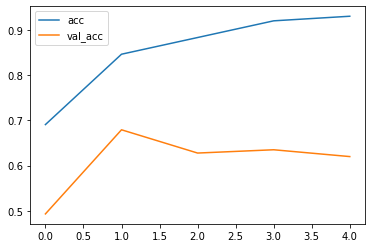

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

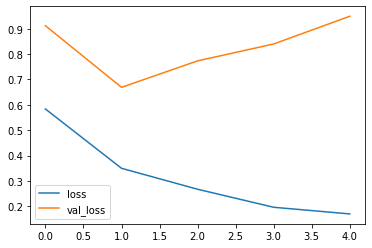

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [20]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [23]:
test_sentence1 = "Tunataka team ziko serious buana."
predict_sentiment(test_sentence1)

test_sentence2 = "not a bad start, keep it up theophilus."
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 35ms/step
Predicted label:  football
1/1 [==============================] - 0s 29ms/step
Predicted label:  football
